In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
import pandas as pd
df = pd.DataFrame(mnist.data,columns=mnist.feature_names)
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
type(mnist.target)
# mnist.frame
# mnist.feature_names
# mnist.images
mnist.target_names
# mnist.DESCR

['class']

In [5]:
X, y = mnist["data"], mnist["target"]
type(X)
X.ndim

2

In [6]:
y.shape

(70000,)

In [7]:
import matplotlib.pyplot as plt 
import matplotlib as mpl

In [9]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

In [10]:
some_digit_image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

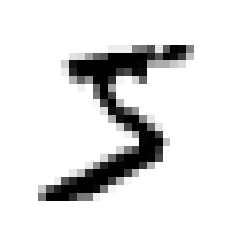

In [11]:
plt.imshow(some_digit_image,cmap=mpl.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [12]:
y[0]

'5'

In [13]:
import numpy as np
y = y.astype(np.uint8)

In [14]:
y.ndim

1

# Training a Binary Classifier

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=101)

In [16]:
X_train.shape

(56000, 784)

In [17]:
y_train.shape

(56000,)

In [18]:
X_test.shape

(14000, 784)

In [19]:
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

In [20]:
y_train_5

array([False,  True, False, ..., False, False,  True])

In [21]:
y_train

array([3, 5, 8, ..., 8, 8, 5], dtype=uint8)

In [22]:
from sklearn.linear_model import SGDClassifier

In [23]:
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train,y_train_5)

SGDClassifier()

In [24]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures

## 1. Measuring Accuracy Using Cross Validation

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96812557, 0.9666256 , 0.97144541])

In [26]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)


In [27]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91246585, 0.91048374, 0.90747884])

####   Only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time.
####   This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).


## 2. Confusion Matrix

#### cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. 

In [29]:
from sklearn.model_selection import cross_val_predict

In [30]:
y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [31]:
y_train_pred

array([False,  True, False, ..., False, False,  True])

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
confusion_matrix(y_train_5,y_train_pred)

array([[49854,  1114],
       [  946,  4086]], dtype=int64)

## 3. Precision And Recall

#### The confusion matrix gives you a lot of information, but sometimes you may prefer a more concise metric. An interesting one to look at is the accuracy of the positive predictions; this is called the precision of the classifier

In [34]:
from sklearn.metrics import precision_score, recall_score

In [35]:
precision_score(y_train_5,y_train_pred)

0.7857692307692308

In [36]:
recall_score(y_train_5,y_train_pred)

0.8120031796502385

#### It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers. The F1 score is  the harmonic mean of precision and recall

#### The classifier will only get a high F1 score if both recall and precision are high.

In [37]:
from sklearn.metrics import f1_score

In [38]:
f1_score(y_train_5,y_train_pred)

0.7986708365910867

   ## Precision/Recall Tradeoff

#### Unfortunately, you can’t have it both ways: increasing precision reduces recall, and vice versa. This is called the precision/recall tradeoff.

#### in some contexts you mostly care about precision, and in other contexts you really care about recall.

#### To understand this tradeoff, let’s look at how the SGDClassifier makes its classification decisions. For each instance, it computes a score based on a decision function, and if that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class.

#### Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores that it uses to make predictions. Instead of calling the classifier’s predict() method, you can call its decision_function() method, which returns a score for each instance, and then make predictions based on those scores using any threshold you want:


In [39]:
y_scores = sgd_clf.decision_function([some_digit])

In [40]:
y_scores

array([4051.00159629])

In [41]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [42]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

#### Now how do you decide which threshold to use?

In [74]:
y_scores = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method="decision_function")

In [75]:
from sklearn.metrics import precision_recall_curve

In [76]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

In [83]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="lower right")
    plt.show()

#     [...] # highlight the threshold, add the legend, axis label and grid

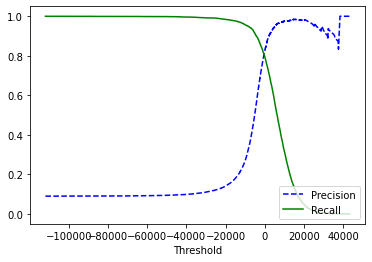

In [84]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

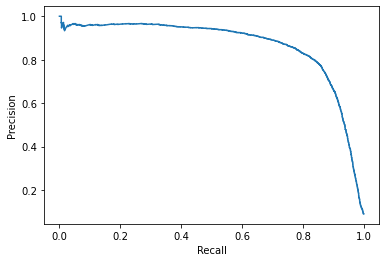

In [54]:
plt.plot(recalls,precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

In [55]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [56]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [57]:
 precision_score(y_train_5, y_train_pred_90)

0.9001858242633395

In [58]:
 recall_score(y_train_5, y_train_pred_90)

0.6738871224165341

### If someone says “let’s reach 99% precision,” you should ask, “at what recall?”

## 4. The ROC Curve

#### It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate.

#### FPR = 1 - TNR , where TNR is specficity. Hence the ROC curve plots sensitivity (recall) versus 1 – specificity.

In [59]:
from sklearn.metrics import roc_curve

In [62]:
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)

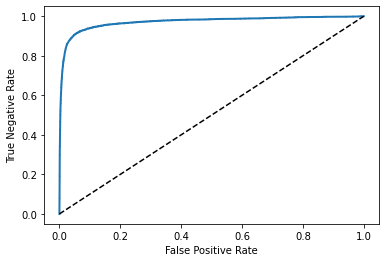

In [64]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
#  [...] # Add axis labels and grid
plot_roc_curve(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Negative Rate")
plt.show()

#### The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).


#### One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

In [65]:
from sklearn.metrics import roc_auc_score

In [66]:
roc_auc_score(y_train_5,y_scores)

0.9708765330233703

#### Since the ROC curve is so similar to the precision/recall (or PR) curve, you may wonder how to decide which one to use. As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives, and the ROC curve otherwise.

In [68]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_prob as_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,method="predict_proba")


In [69]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

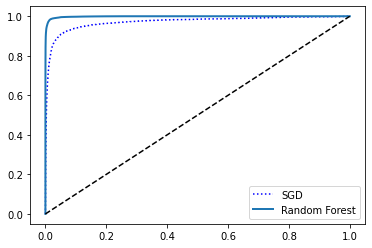

In [70]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [71]:
roc_auc_score(y_train_5, y_scores_forest)

0.9986234816683507